# Feedback from check in 2
Ignoring the RNA data and analyzing the metadata (like the importance of age or her2_status_measured_by_snp6) on overall_survival. 

# Steps
1. Set up imports
2. Load data
3. Split into training and testing data
4. Train model to look for correlation between age and survival
5. Make plot and evaluate accuracy


In [1]:
#pip install scikit-learn
#pip install pandas


In [2]:
#pip install matplotlib

In [15]:
# set up imports
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load dataset
bc_df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')

# look at the shape of data
bc_df.shape

/tmp/ipykernel_7707/3041465478.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  bc_df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')


(1904, 693)

In [5]:
# look at dataframe
bc_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# look at data on overall survival
bc_df['overall_survival'].value_counts()

overall_survival
0    1103
1     801
Name: count, dtype: int64

In [7]:
# Split data
X = bc_df[['age_at_diagnosis']]
y = bc_df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train data
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [8]:
# checking the age range
young = bc_df['age_at_diagnosis'].min()
old = bc_df['age_at_diagnosis'].max()

print(young, old)

21.93 96.29


/tmp/ipykernel_7707/303133570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bc_df.groupby('age_group')['overall_survival'].mean()


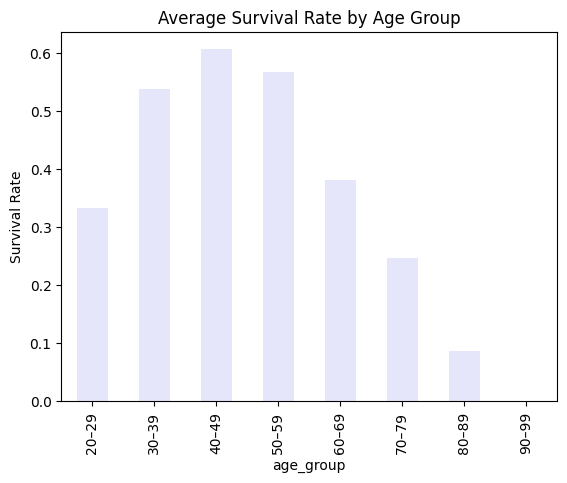

In [9]:
# catagorize survival rate under certain age
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90–99']
bc_df['age_group'] = pd.cut(bc_df['age_at_diagnosis'], bins=age_bins, labels=age_labels, right=False)

# calculating survival rate for each age group
grouped = bc_df.groupby('age_group')['overall_survival'].mean()

# plot
grouped.plot(kind='bar', color='lavender')
plt.ylabel("Survival Rate")
plt.title("Average Survival Rate by Age Group")

plt.show()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


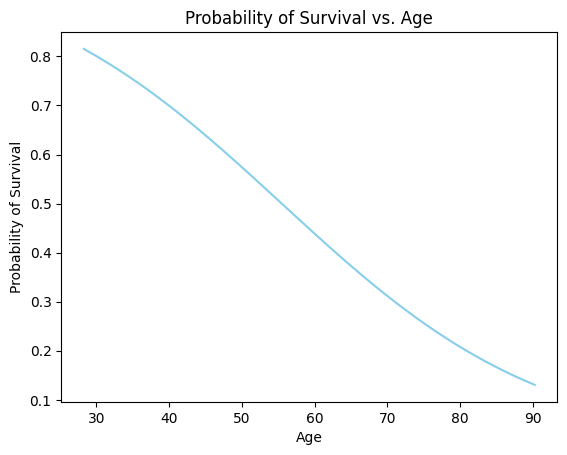

In [10]:
# predicting survival rate based on age
age_test = X_test['age_at_diagnosis'].values.reshape(-1, 1)
predicted_probs = model.predict_proba(age_test)[:, 1]

sorted_indices = np.argsort(age_test[:, 0])
sorted_ages = age_test[sorted_indices]
sorted_probs = predicted_probs[sorted_indices]

plt.plot(sorted_ages, sorted_probs, color='skyblue', label="Predicted Probability")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")
plt.title("Probability of Survival vs. Age")


plt.show()


In [11]:
# accurancy evaluation
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6115485564304461

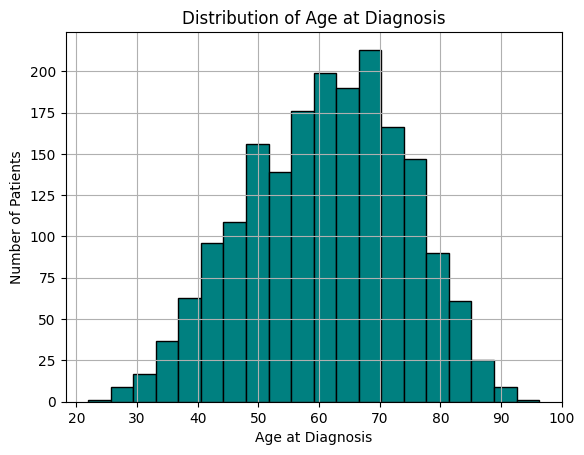

In [12]:
# Plot distribution of age at diagnosis
plt.hist(bc_df['age_at_diagnosis'], bins=20, color='teal', edgecolor='black')
plt.xlabel("Age at Diagnosis")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age at Diagnosis")
plt.grid(True)
plt.show()

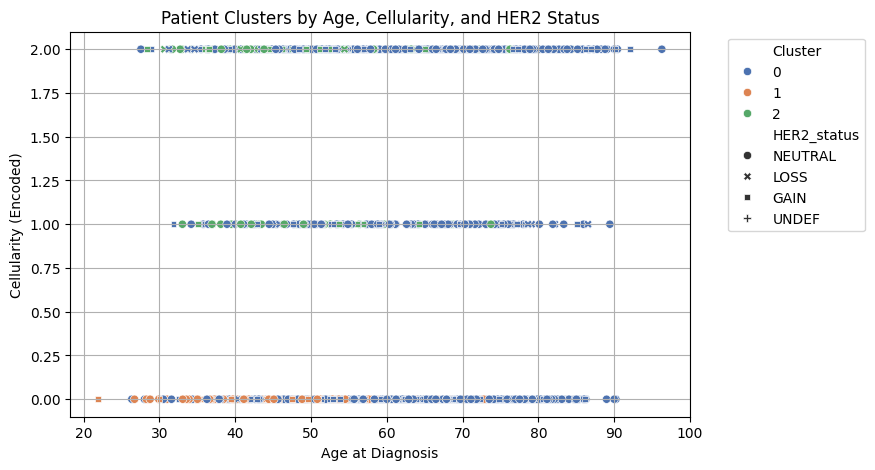

In [13]:
# Select relevant features
features = ['age_at_diagnosis', 'cellularity', 'chemotherapy']
df_cluster = bc_df[features].dropna()

# Convert categorical column 'cellularity' to numeric
le = LabelEncoder()
df_cluster['cellularity'] = le.fit_transform(df_cluster['cellularity'])

# Normalize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters back to df_cluster
df_cluster['Cluster'] = clusters
df_cluster['HER2_status'] = bc_df.loc[df_cluster.index, 'her2_status_measured_by_snp6']

# Plot
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cluster, x='age_at_diagnosis', y='cellularity', hue='Cluster', style='HER2_status', palette='deep')
plt.title('Patient Clusters by Age, Cellularity, and HER2 Status')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Cellularity (Encoded)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [18]:
# Load your dataset 
df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')  # Or whatever your file is called

# Preview it to make sure it loaded correctly
df.head()


/tmp/ipykernel_7707/3774128145.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')  # Or whatever your file is called


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_7707/4154826841.py:8: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')  # Adjust path if needed


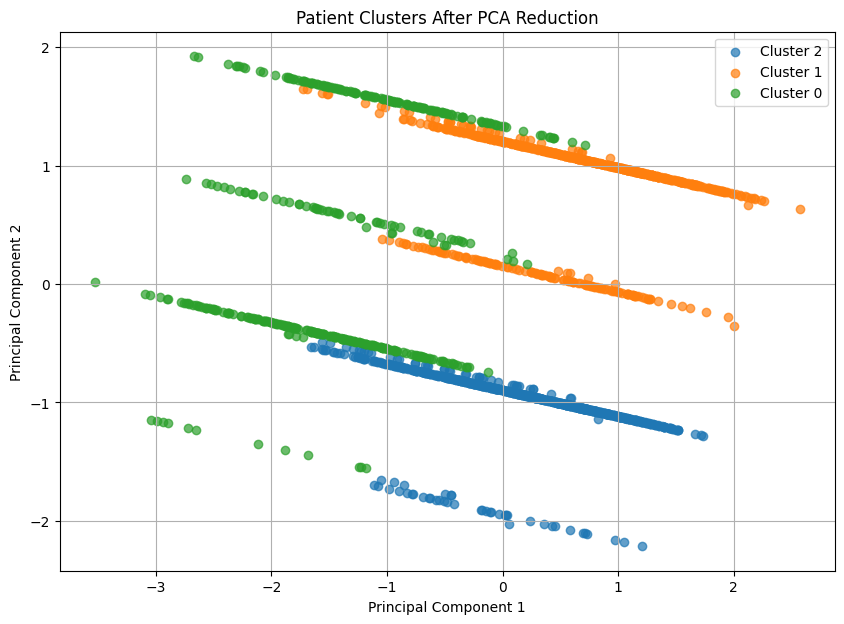

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('METABRIC_RNA_Mutation 2.csv')  # Adjust path if needed

# Select and copy relevant features
features = ['age_at_diagnosis', 'cellularity', 'her2_status_measured_by_snp6']
X = df[features].copy()

# Convert categorical variables to numeric
X.loc[:, 'cellularity'] = X['cellularity'].astype('category').cat.codes
X.loc[:, 'her2_status_measured_by_snp6'] = X['her2_status_measured_by_snp6'].astype('category').cat.codes

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Add cluster labels to original df

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create PCA plot DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']
pca_df['HER2_status'] = df['her2_status_measured_by_snp6']

# Plot
plt.figure(figsize=(10, 7))
for cluster_label in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.title('Patient Clusters After PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


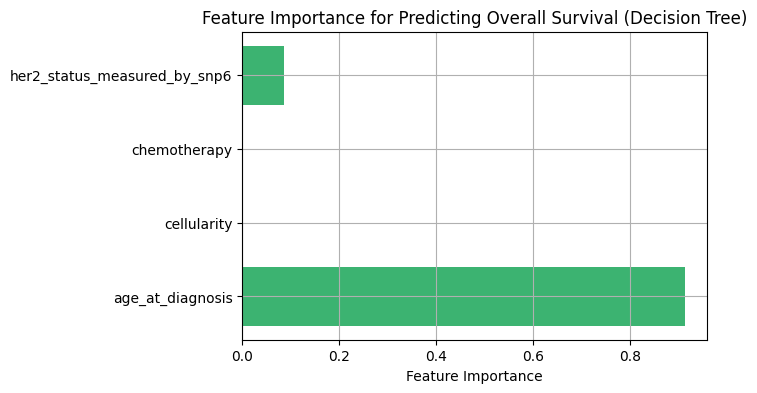

In [14]:
# Select features (include numeric and encoded categorical)
features = ['age_at_diagnosis', 'cellularity', 'chemotherapy', 'her2_status_measured_by_snp6']
df_tree = bc_df[features + ['overall_survival']].dropna()

# Encode categorical features
df_tree['cellularity'] = LabelEncoder().fit_transform(df_tree['cellularity'])
df_tree['chemotherapy'] = df_tree['chemotherapy'].astype(int)  # Already numeric
df_tree['her2_status_measured_by_snp6'] = LabelEncoder().fit_transform(df_tree['her2_status_measured_by_snp6'])

# Split into X and y
X = df_tree[features]
y = df_tree['overall_survival']

# Train decision tree
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X, y)

# Plot feature importances
import matplotlib.pyplot as plt

importances = tree.feature_importances_
plt.figure(figsize=(6, 4))
plt.barh(features, importances, color='mediumseagreen')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Predicting Overall Survival (Decision Tree)")
plt.grid(True)
plt.show()